<a href="https://colab.research.google.com/github/futabato/LT/blob/master/2020/chroma_key/Video_ChromaKey.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

各セルのコードは `Shift + Enter` で実行することができます．  
上から4つ目のセルは背景画像をセットするものなので，Google Driveにある好きな画像(png形式)をセットしてください．  
`back_image = cv2.imread("` ここに画像を置く `", cv2.IMREAD_UNCHANGED)`

In [ ]:
# リンクをクリックしてドライブをマウントしてください（その方が楽そう）
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode
from IPython.display import Image
import cv2
from google.colab.patches import cv2_imshow
import numpy as np

In [ ]:
cd drive/My\ Drive

/content/drive/My Drive


In [ ]:
# imread() の中に背景に置く好きな画像を指定してください
# png画像でないと動作しないかも
back_image = cv2.imread("median_5.png", cv2.IMREAD_UNCHANGED)

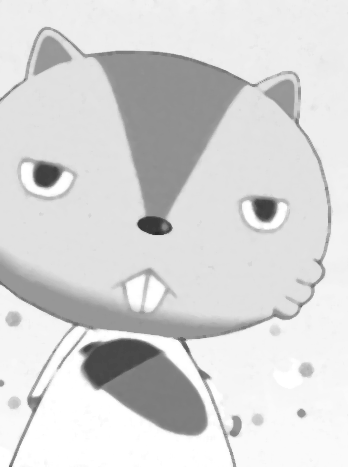

In [ ]:
# このセルを実行することで，ちゃんと読み込めているか確認できます．
cv2_imshow(back_image)

In [ ]:
def take_photo(filename='photo.png', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/png', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

In [ ]:
def ExtractionColor(frame, back_image):
    back_image = cv2.resize(back_image, dsize=(800, 800))
    # frame = cv2.resize(frame, dsize=(800, 800))
    
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
    hsv_min = np.array([30, 64, 0])
    hsv_max = np.array([90, 255, 255])
    
    src_image_mask = cv2.inRange(hsv, hsv_min, hsv_max)
    object_image = cv2.bitwise_and(back_image, back_image, mask = src_image_mask)
    extraction = cv2.bitwise_not(src_image_mask)
    embedded = cv2.bitwise_and(frame, frame, mask = extraction)
    ChromaKey = cv2.bitwise_or(object_image, embedded)
    
    return ChromaKey

In [ ]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

<IPython.core.display.Javascript object>

KeyboardInterrupt: ignored

In [ ]:
def main(back_image):
    video_capture = cv2.VideoCapture(0)

    video_capture.set(cv2.CAP_PROP_FPS, 30)
    
    while True:
        ret, frame = video_capture.read()
        
        cv2_imshow("ChromaKey", ExtractionColor(frame, back_image))
    
        if cv2.waitKey(1) & 0xFF == ord("q"):
            break

    video_capture.release()
    cv2.destroyAllWindows()

In [ ]:
main(back_image)

error: ignored